In [30]:
import copy
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-v0_8")

In [37]:
class Environment:
    def __init__(self, thetas: [float]):
        self.thetas = thetas


def react(env: Environment, arm: int) -> float:
    if np.random.random() < env.thetas[arm]:
        return 1.0
    else:
        return 0


class State:
    def __init__(self, n_arms: int):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)


def update(state: State, arm: int, reward: float) -> State:
    s = copy.deepcopy(state)
    s.counts[arm] += 1
    s.values[arm] = ((s.counts[arm] - 1) * s.values[arm] + reward) / s.counts[arm]
    return s


env = Environment([0.80, 0.50, 0.35, 0.60])

print(f"Num. arms: {len(env.thetas)}")
print(f"Try the arm 1: {react(env, 1)}")

Num. arms: 4
Try the arm 1: 0


# Q1. Implement the anneaing softmax agent

In [38]:
class AnnealingSoftmaxAgent(object):
    def __init__(self, num_arms: int, tau=1000.0):
        self.tau = tau
        self.counts = np.zeros(num_arms)
        self.values = np.zeros(num_arms)

    def get_arm(self, state: State):
        logit = self.values / self.tau
        logit = logit - np.max(logit)
        p = np.exp(logit) / sum(np.exp(logit))

        arm = np.random.choice(state.n_arms, p=p)
        raise NotImplementedError("Update the `self.tau`")
        return arm

# Q2. evaluate the agent's performance'

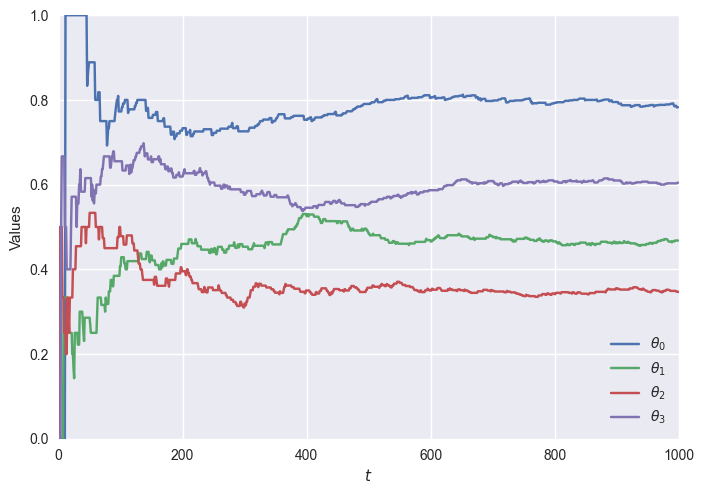

In [39]:
agent = AnnealingSoftmaxAgent(len(env.thetas))
budget = 1000

value_snapshots = np.zeros((1000, 4))
rewards = np.zeros(1000)
state = State(len(env.thetas))

for t in range(budget):
    arm = agent.get_arm(state)
    reward = react(env, arm)
    rewards[t] = reward
    state = update(state, arm, reward)

    value_snapshots[t, :] = state.values.copy()

plt.plot(value_snapshots[:, 0], label=r'$\theta_0$')
plt.plot(value_snapshots[:, 1], label=r'$\theta_1$')
plt.plot(value_snapshots[:, 2], label=r'$\theta_2$')
plt.plot(value_snapshots[:, 3], label=r'$\theta_3$')

plt.xlim([0, 1000])
plt.ylim([0, 1])

plt.xlabel(r"$t$")
plt.ylabel("Values")
plt.legend()
plt.show()